# Ques-5

# Load Libraries

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astroML

# Load Dataset

In [2]:
dataset=pd.read_csv("C:/Users/ssand/Dataset/exoplanet.eu_catalog.csv")

In [3]:
dataset

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.100,1.100,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.230,0.230,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,9.10,NaN,NaN,5.2150,NaN,NaN,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,ups And c,Confirmed,9.10,2.93,5.04,1.8000,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5296,ups And d,Confirmed,23.58,2.29,2.93,10.1900,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5297,ups And e,Confirmed,NaN,NaN,NaN,1.0590,0.028,0.028,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5298,ups Leo b,Confirmed,NaN,NaN,NaN,0.5100,0.260,0.080,NaN,NaN,...,G9 III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(5300, 98)

In [5]:
print("Single column value using dataframe[]")
print(dataset['eccentricity'])

Single column value using dataframe[]
0       0.23100
1           NaN
2       0.08000
3       0.00000
4       0.36900
         ...   
5295    0.24450
5296    0.31600
5297    0.00536
5298    0.32000
5299        NaN
Name: eccentricity, Length: 5300, dtype: float64


In [7]:
e=dataset['eccentricity']

In [8]:
e.shape

(5300,)

In [9]:
e=e.dropna()
e.shape

(2144,)

In [10]:
e_new=np.array(e)
e_new
e.shape

(2144,)

In [11]:
e_new[e_new < 0] = 0
print("New Array :")
e_new

New Array :


array([0.231  , 0.08   , 0.     , ..., 0.316  , 0.00536, 0.32   ])

In [12]:
e_new=e_new[e_new != 0]

In [13]:
e_new

array([0.231  , 0.08   , 0.369  , ..., 0.316  , 0.00536, 0.32   ])

In [14]:
e_new.shape

(1703,)

# Removing the columns with NA

In [15]:
print(e_new)

[0.231   0.08    0.369   ... 0.316   0.00536 0.32   ]


# Histogram plot for given data

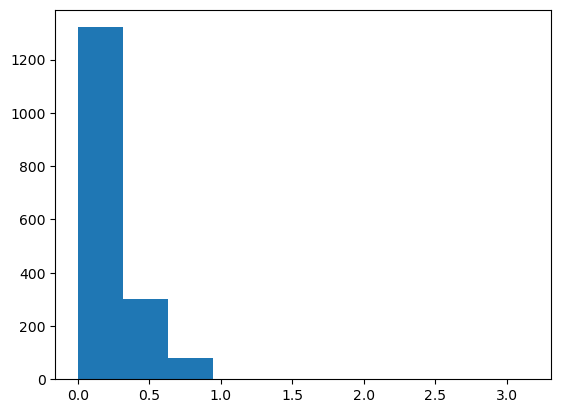

In [16]:
plt.hist(e_new)
plt.show()

# Box-Cox transformation

In [17]:
from scipy.stats import boxcox
from scipy.special import boxcox
import seaborn as sns
fitted_data,_ = stats.boxcox(e_new)

# Histogram with Box-Cox transformation

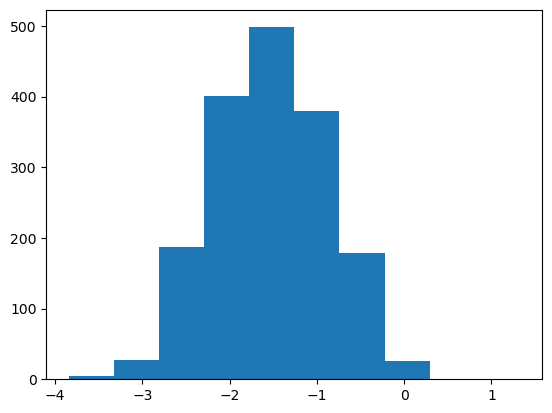

In [18]:
plt.hist(fitted_data)
plt.show()

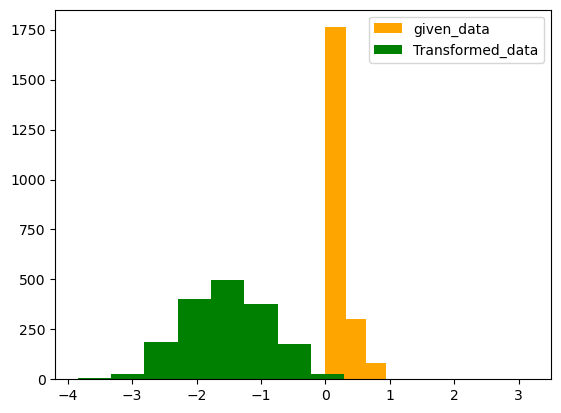

In [19]:
plt.hist(e,color='orange')
plt.hist(fitted_data,color='green')
plt.legend(['given_data','Transformed_data'])
plt.show()